In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### K - means algorithm

The K-means algorithm is a method to automatically cluster similar
data points together. 

* Concretely, you are given a training set $\{x^{(1)}, ..., x^{(m)}\}$, and you want
to group the data into a few cohesive “clusters”. 


* K-means is an iterative procedure that
     * Starts by guessing the initial centroids, and then 
     * Refines this guess by 
         * Repeatedly assigning examples to their closest centroids, and then 
         * Recomputing the centroids based on the assignments.
         

* In pseudocode, the K-means algorithm is as follows:

    ``` python
    # Initialize centroids
    # K is the number of clusters
    centroids = kMeans_init_centroids(X, K)
    
    for iter in range(iterations):
        # Cluster assignment step: 
        # Assign each data point to the closest centroid. 
        # idx[i] corresponds to the index of the centroid 
        # assigned to example i
        idx = find_closest_centroids(X, centroids)

        # Move centroid step: 
        # Compute means based on centroid assignments
        centroids = compute_means(X, idx, K)
    ```

* The inner-loop of the algorithm repeatedly carries out two steps: 
    * (i) Assigning each training example $x^{(i)}$ to its closest centroid, and
    * (ii) Recomputing the mean of each centroid using the points assigned to it. 
    
    
* The $K$-means algorithm will always converge to some final set of means for the centroids. 

* However, that the converged solution may not always be ideal and depends on the initial setting of the centroids.
    * Therefore, in practice the K-means algorithm is usually run a few times with different random initializations. 
    * One way to choose between these different solutions from different random initializations is to choose the one with the lowest cost function value (distortion).

1.1 Finding closest centroids

In the “cluster assignment” phase of the K-means algorithm, the
algorithm assigns every training example $x^{(i)}$ to its closest
centroid, given the current positions of centroids. 

Your task is to complete the code in `find_closest_centroids`. 
* This function takes the data matrix `X` and the locations of all
centroids inside `centroids` 
* It should output a one-dimensional array `idx` (which has the same number of elements as `X`) that holds the index  of the closest centroid (a value in $\{1,...,K\}$, where $K$ is total number of centroids) to every training example .
* Specifically, for every example $x^{(i)}$ we set
$$c^{(i)} := j \quad \mathrm{that \; minimizes} \quad ||x^{(i)} - \mu_j||^2,$$
where 
 * $c^{(i)}$ is the index of the centroid that is closest to $x^{(i)}$ (corresponds to `idx[i]` in the starter code), and 
 * $\mu_j$ is the position (value) of the $j$’th centroid. (stored in `centroids` in the starter code)

In [13]:
def find_closest_centroids(X, centroids):
    """
    Computes the centroid memberships for every example
    
    Args:
        X (ndarray): (m, n) Input values      
        centroids (ndarray): k centroids
    
    Returns:
        idx (array_like): (m,) closest centroids
    
    """
    m = X.shape[0] # number of examples
    idx = np.zeros(m, dtype=int) # shape is (m,)
    
    for i in range(m):
      # distances = np.linalg.norm(centroids - X[i, :], axis=1) # shape is (k,) less optimized due to square root overhead in L2 norm
      distances =  np.sum(np.square(centroids - X[i, :]), axis=1) # shape is (k,)
      idx[i] = np.argmin(distances) # 0 based indexing of centroids position
    return idx

In [11]:
X = np.load("data/data-kmeans.npy")
print(X[:5])
print(X.shape)

[[1.84207953 4.6075716 ]
 [5.65858312 4.79996405]
 [6.35257892 3.2908545 ]
 [2.90401653 4.61220411]
 [3.23197916 4.93989405]]
(300, 2)


In [14]:
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]]) # 3 centroids

idx = find_closest_centroids(X, initial_centroids)
print(idx[:5])
print(idx.shape)

[0 2 1 0 0]
(300,)


In [15]:
def compute_centroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the 
    data points assigned to each centroid.
    
    Args:
        X (ndarray):   (m, n) Data points
        idx (ndarray): (m,) Array containing index of closest centroid for each 
                       example in X. Concretely, idx[i] contains the index of 
                       the centroid closest to example i
        K (int):       number of centroids
    
    Returns:
        centroids (ndarray): (K, n) New centroids computed
    """
    m, n = X.shape
    centroids = np.zeros((K, n))
    
    for k in range(K):
        centroids[k, :] = np.mean(X[idx == k, :], axis=0)
    
    return centroids
  

In [16]:
K = 3 
centroids = compute_centroids(X, idx, K)
print(f"centroids:\n {centroids}")

centroids:
 [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


In [17]:
from unsup_utils import plot_progress_kMeans

In [18]:
# You do not need to implement anything for this part

def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):
    """
    Runs the K-Means algorithm on data matrix X, where each row of X
    is a single example
    """
    
    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids    
    idx = np.zeros(m)
    
    # Run K-Means
    for i in range(max_iters):
        
        #Output progress
        print("K-Means iteration %d/%d" % (i, max_iters-1))
        
        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)
        
        # Optionally plot progress
        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids
            
        # Given the memberships, compute new centroids
        centroids = compute_centroids(X, idx, K)
    plt.show() 
    return centroids, idx

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


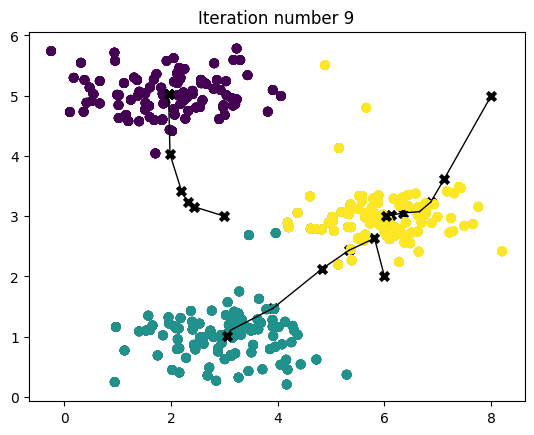

In [20]:
X = np.load('data/data-kmeans.npy')

initial_centroids = np.array([[3,3], [6, 2], [8,5]])
K = 3
max_iters = 10
centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)